<a href="https://colab.research.google.com/github/amit1476/myUbuntuRep/blob/master/Ultra_ch5_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import seaborn as sns

In [41]:
iris = sns.load_dataset("iris")

In [42]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [43]:
type(iris)

pandas.core.frame.DataFrame

In [44]:
iris.shape

(150, 5)

In [45]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [46]:
virg = iris['species']=="virginica"
iris_virginica = iris[virg]
iris_virginica.head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [47]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

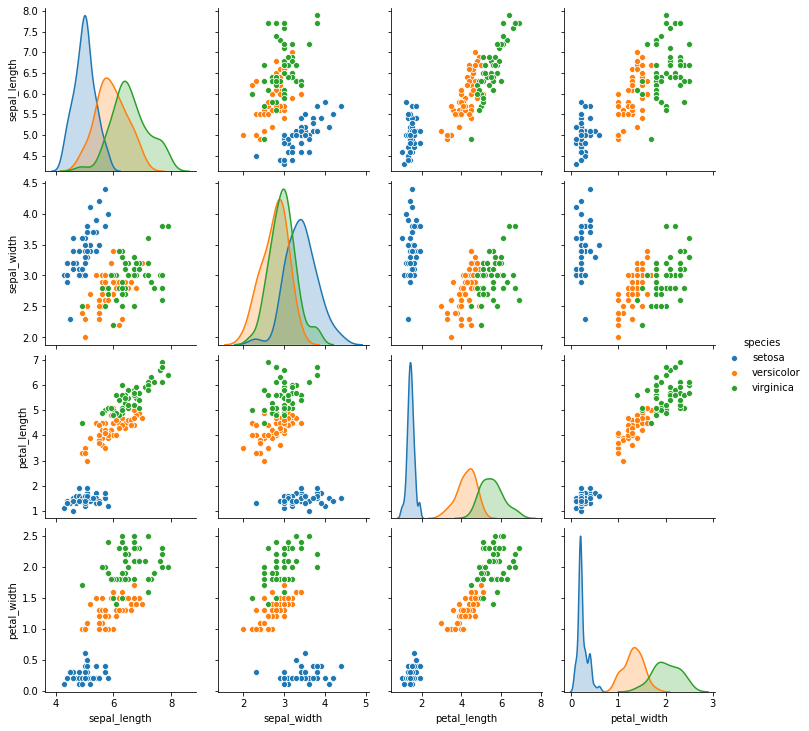

In [48]:
sns.pairplot(iris,hue='species')

In [49]:
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
X_iris.shape, y_iris.shape 

((150, 4), (150,))

In [50]:
iris.shape

(150, 5)

In [51]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(10)

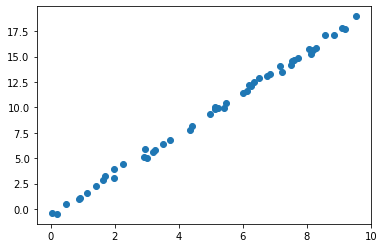

In [52]:
x = 10 * rng.rand(50)
y = 2* x -1 + rng.rand(50)
plt.scatter(x,y) 

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
x.shape

(50,)

In [56]:
help(np.newaxis)

Help on NoneType object:

class NoneType(object)
 |  Methods defined here:
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __repr__(self, /)
 |      Return repr(self).



In [57]:
# creating x as a matrix
X = x[:, np.newaxis]
X.shape

(50, 1)

In [58]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
model.coef_ # slope

array([2.0110247])

In [60]:
model.intercept_ # intercept

-0.5864561853862273

In [61]:
# prediction
# create new sample values
x_new = np.linspace(-1,10,num=50)
# formulate input as a matrix
X_new = x_new[:, np.newaxis]
X_new.shape

(50, 1)

In [62]:
y_new = model.predict(X_new)

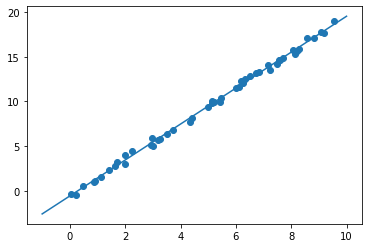

In [63]:
plt.scatter(x,y)
plt.plot(x_new, y_new)

In [64]:
# creating a baseline model using Gaussian naive Bayes
# create the train test split first
#from sklearn.cross_validation import train_test_split -- cross_validation phased out, inplace use model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state = 42)

In [65]:
from sklearn.naive_bayes import GaussianNB # model class
model = GaussianNB() # instantiate the model
model.fit(X_train, y_train)
y_model = model.predict(X_test)

In [66]:
#checking accuracy of model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model) 

1.0

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_model))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [68]:
# trying same iris out using linear regression.. let's see
new_model = LinearRegression() #using default hyperparameters

# could not do the below portion as I have to convert the target labels to one-hot encoding.. later..
"""
new_model.fit(X_train, y_train) 
y_new = new_model.predict(X_test)
accuracy_score(y_test, y_new)
"""

'\nnew_model.fit(X_train, y_train) \ny_new = new_model.predict(X_test)\naccuracy_score(y_test, y_new)\n'

In [69]:
from sklearn.decomposition import PCA
model_pca = PCA(n_components =3)
model_pca.fit(X_iris)
X_2D = model_pca.transform(X_iris)

In [70]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]

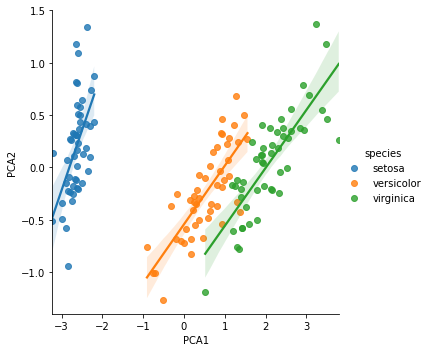

In [71]:
sns.lmplot('PCA1','PCA2', hue='species',data=iris)

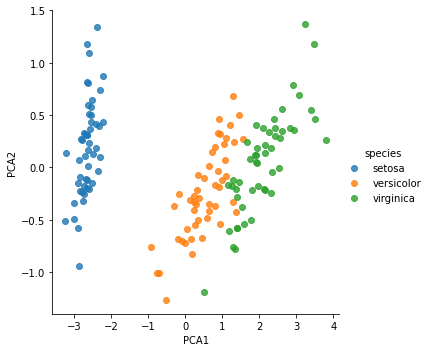

In [72]:
sns.lmplot('PCA1','PCA2', hue='species',data=iris, fit_reg=False)

In [78]:
#from sklearn.mixture import GaussianMixture
from sklearn import mixture
# the book mentions GMM -- is outdated looks like

In [79]:
#model_gmm = GaussianMixture(n_components=3, covariance_type='full')
#gaussian_mixture(n_components =3, covariance_type='full')

model_gmm = mixture.GaussianMixture(n_components=3, covariance_type='full')

In [80]:
model_gmm.fit(X_iris)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [82]:
y_gmm = model_gmm.predict(X_iris) #interesting this model has a predict method despite being a unsupervised algo

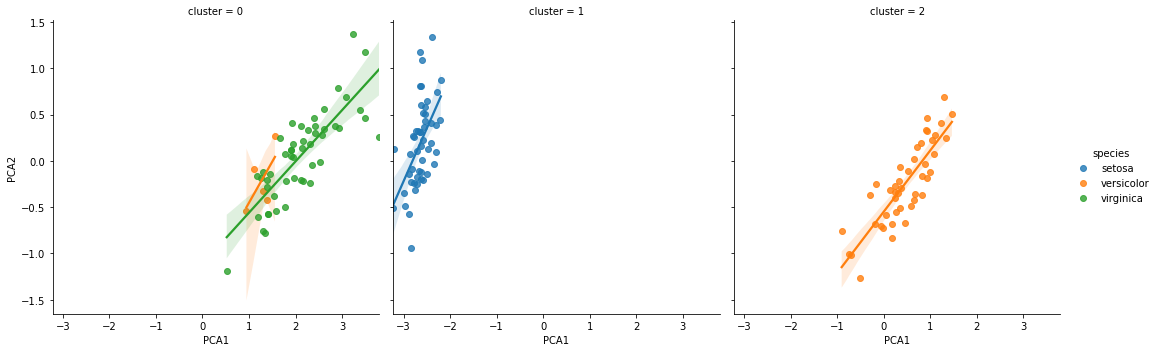

In [86]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster') #, fit_reg=False);

In [87]:
# starting on loading digits.

In [88]:
from sklearn.datasets import load_digits

In [90]:
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [91]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

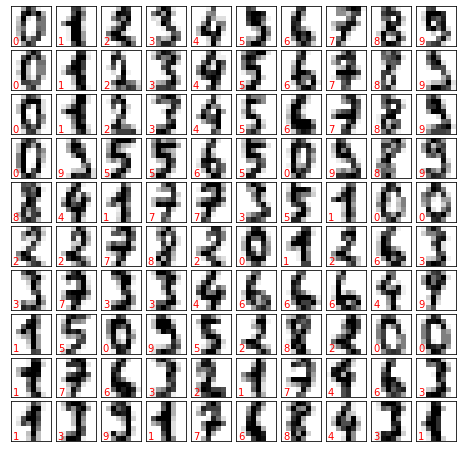

In [99]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                                 subplot_kw={'xticks':[], 'yticks':[]},
                                 gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='red')

In [100]:
X = digits.data
y = digits.target
X.shape, y.shape

((1797, 64), (1797,))

In [106]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

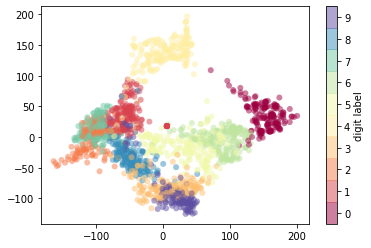

In [111]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
                    edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [112]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [113]:
#from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

In [119]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)

#sns.heatmap(map, square=True, annot=True, cbar=False)

#plt.xlabel('predicted value')
#plt.ylabel('true value');

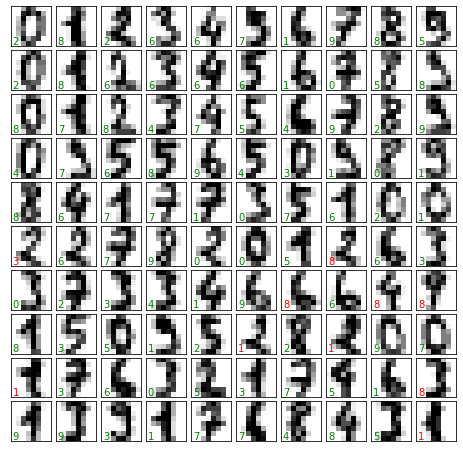

In [120]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                                 subplot_kw={'xticks':[], 'yticks':[]},
                                 gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')